In [ ]:
## In progress ##

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
import os
this_loc = os.getcwd()

In [11]:
data_path = keras.utils.get_file(this_loc + "/auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
data_path

'D:\\MyGitHub\\Linear-Regression-using-Keras/auto-mpg.data'

In [17]:
df = pd.read_csv(data_path, sep=" ",comment='\t', skipinitialspace=True, header=None)
df

,0,1,2,3,4,5,6,7
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1


In [18]:
column_names = ['mpg','cylinders','displacement','horsepower','weight',
                'acceleration', 'model_year', 'origin']
df.columns=column_names
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [19]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [21]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [24]:
df.horsepower.max()

'?'

In [31]:
df_missing_hp = df[df.horsepower=='?']

In [36]:
df_v1 = df[df.horsepower!='?']
df_v1.shape

(392, 8)

In [37]:
df_v1 = pd.get_dummies(df_v1, columns=['origin'])
df_v1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.00,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,0,0


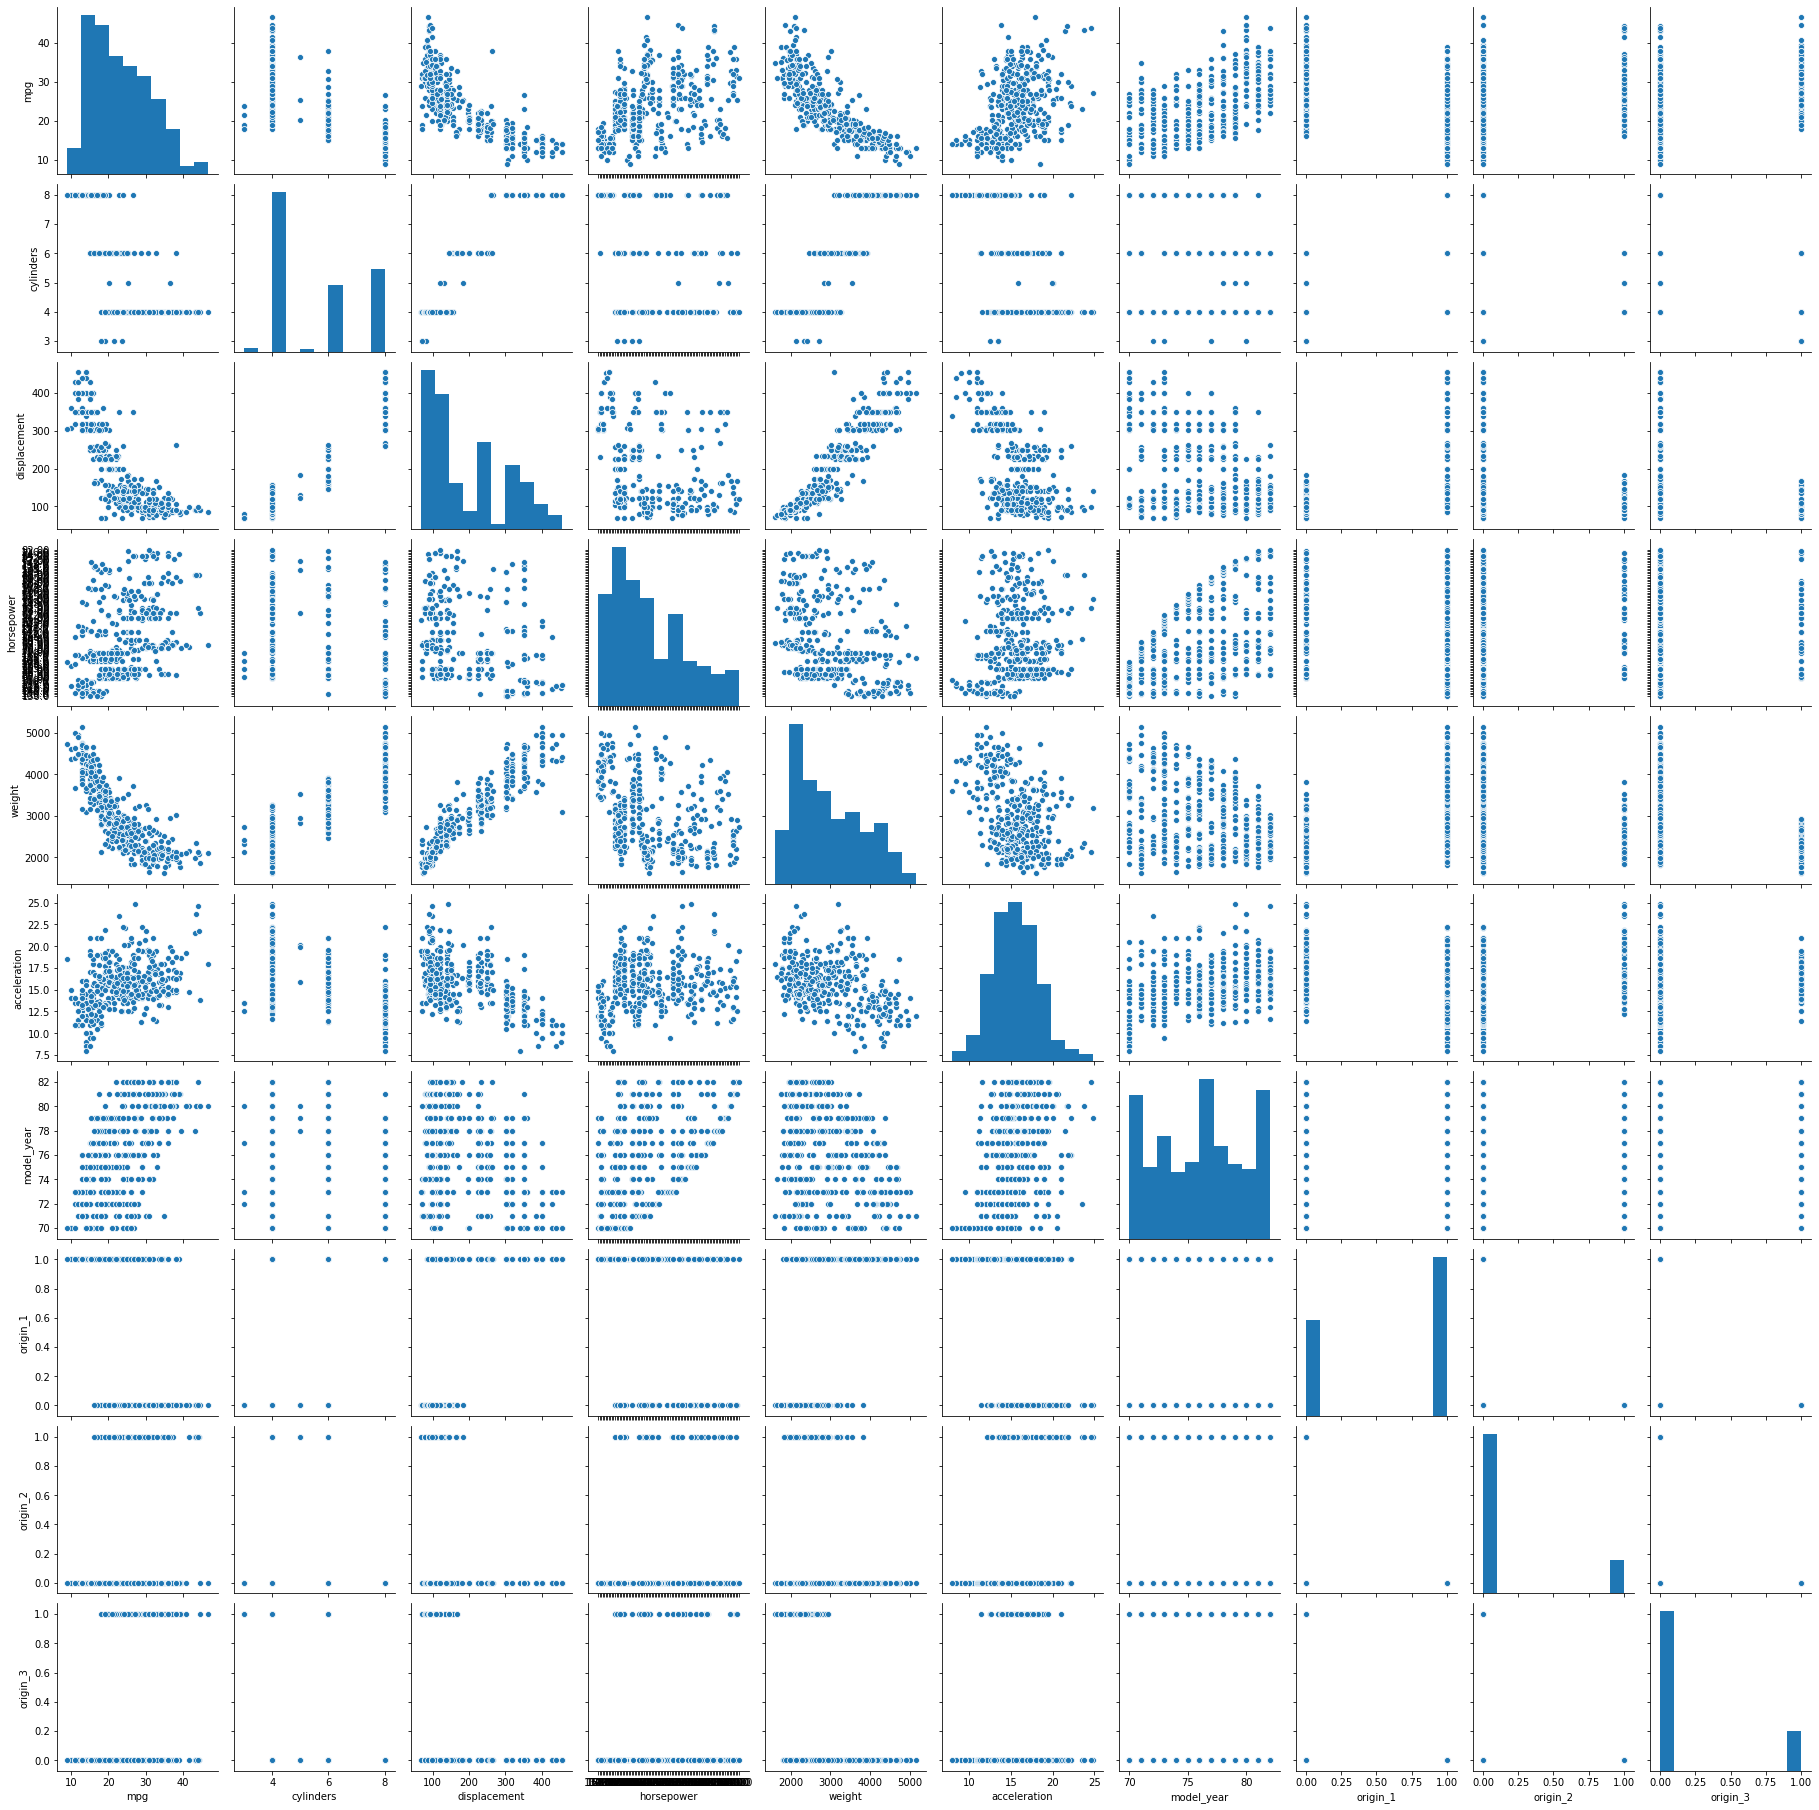

In [40]:
sns.pairplot(df_v1)

## Observations:

mpg has clear correlations with displacement horsepower, weight, acceleration. These are our continuous variables.

displacement and weight have the most clear linearly fittable relationship among them. Others are slightly on the exponential  side.

## Features and Label

In [48]:
feature_col_names = list(df_v1.columns)
label_col_name = feature_col_names.pop(0)
feature_col_names, label_col_name

(['cylinders',
  'displacement',
  'horsepower',
  'weight',
  'acceleration',
  'model_year',
  'origin_1',
  'origin_2',
  'origin_3'],
 'mpg')

## Building the Linear Regression Model

In [50]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(feature_col_names)]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

## Why 

* Sequential:
* Relu

In [51]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
